In [1]:
from __future__ import annotations


In [2]:
from config.dl_model_config import DLModelConfig

from sklearn.gaussian_process.kernels import RBF

from ipsqt.prediction.ml.gpc_predictor import GPCPredictor as Predictor
from ipsqt.strategies.predicted.momentum_reversal_strategy import (
    MomentumReversalStrategy as Strategy,
)

from run import initialize

In [3]:
REBAL_FREQ = "ME"
RETRAIN_NUM_DAYS = 30
SAVE = True

In [4]:
preprocessor, runner = initialize()

model_config = DLModelConfig()
model_config.n_features = len(runner.available_features)
model_config.n_classes = 2
model_config.n_epochs = 20

predictor = Predictor(kernel=RBF(), model_config=model_config)

strategy = Strategy(
    predictor=predictor,
    retrain_num_days=RETRAIN_NUM_DAYS,
)

strategy_name = strategy.__class__.__name__
model_name = predictor.model.__class__.__name__

Backtest on 1992-08-31 00:00:00 to 2024-05-31 00:00:00
Num Train Iterations: 365
Num OOS Daily Points: 365


In [5]:
result = runner(
    feature_processor=preprocessor,
    strategy=strategy,
    hedger=None,
)

Computing Weights: 100%|██████████| 365/365 [00:18<00:00, 19.28it/s]


In [6]:
print(result)

StrategyStatistics:
* final_nav = 6.713674
* geom_avg_total_r = 0.059064
* geom_avg_xs_r = 0.037798
* std_xs_r = 0.151723
* min_xs_r = -0.279921
* max_xs_r = 0.130893
* skew = -1.113968
* kurtosis = 5.930756
* max_dd = -0.583414
* sharpe = 0.249123
* alpha_buy_hold = -0.033367
* tracking_error_buy_hold = 0.148395
* ir_buy_hold = -0.224855
* factor_loadings = {'MKT_Factor': 0.5207045088564284}
* alpha_benchmark = -0.001895
* alpha_benchmark_pvalue = 0.759574
* tracking_error_benchmark = 0.129727
* ir_benchmark = -0.014605
* ttest_pval = 0.798813
* levene_pval = 0.680438
* timing_ability_coef = -0.187399
* timing_ability_pval = 0.169990


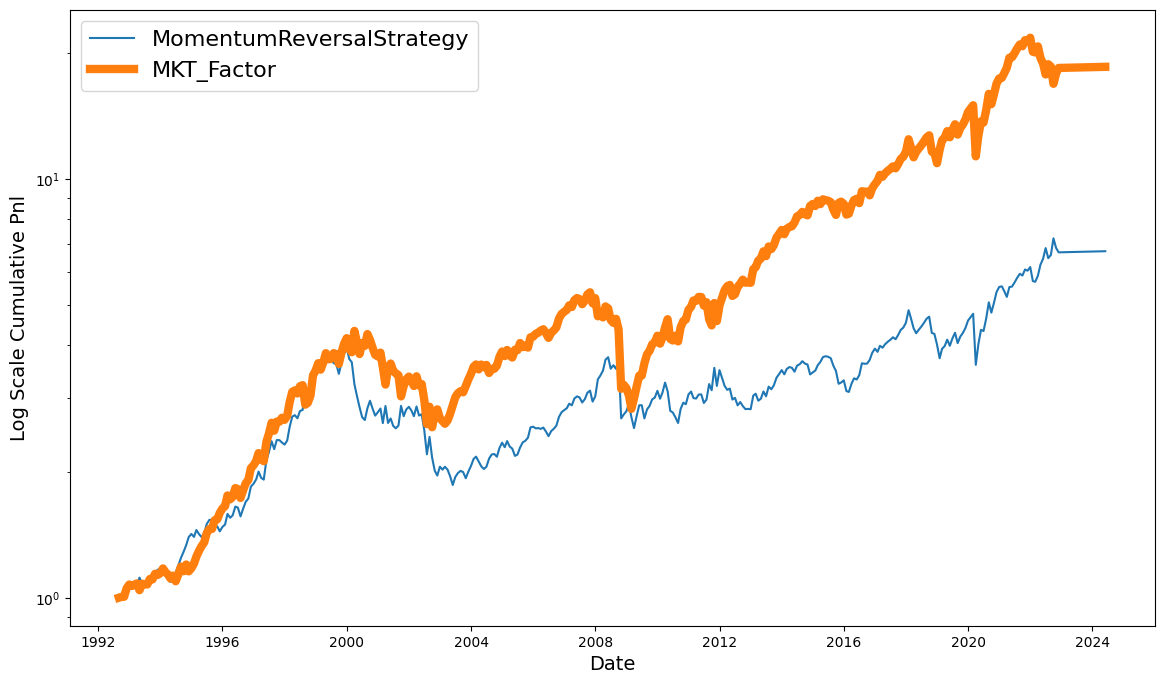

In [7]:
runner.plot_cumulative(
    strategy_name=strategy_name,
    include_factors=True,
)

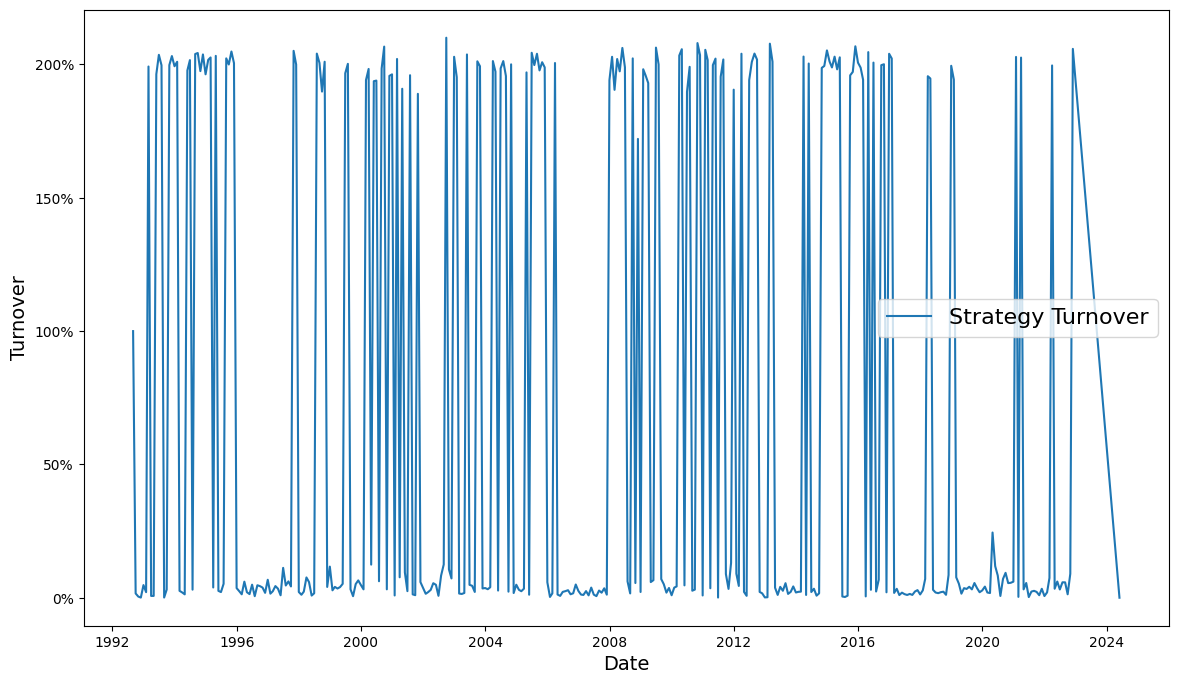

In [8]:
runner.plot_turnover()

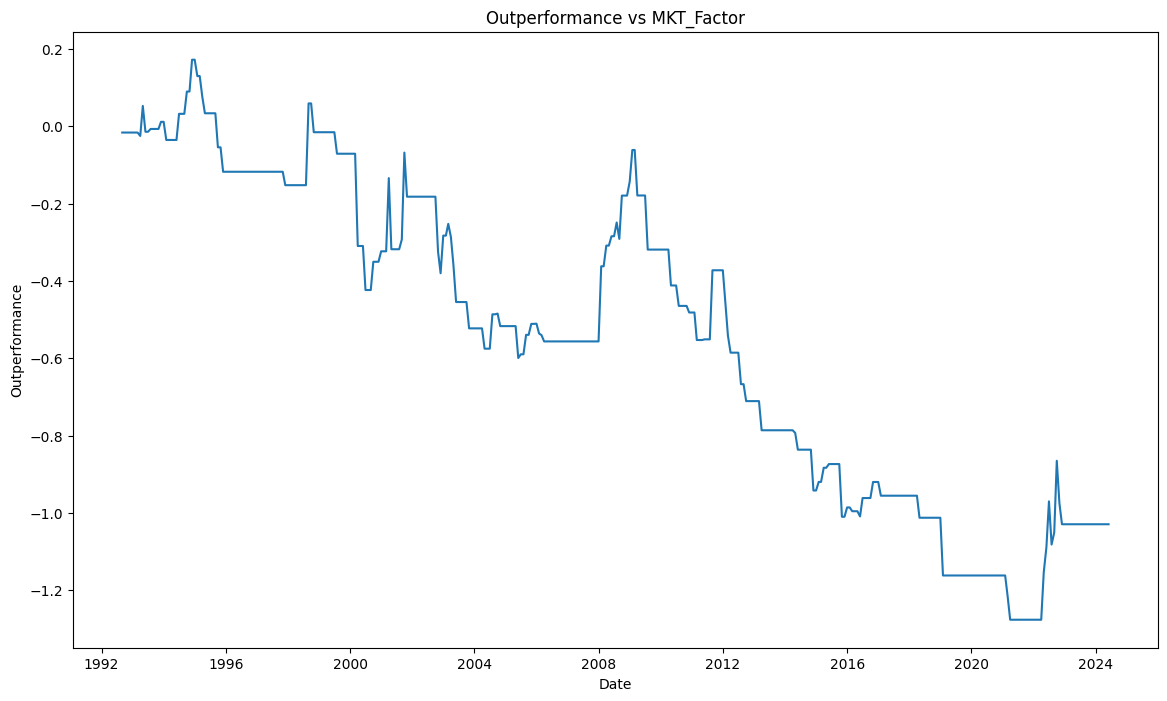

In [9]:
runner.plot_outperformance(mkt_only=True)

In [10]:
if SAVE:
    runner.save(f"{strategy_name}_" + model_name + f"_rebal{REBAL_FREQ}")

<Axes: xlabel='date'>

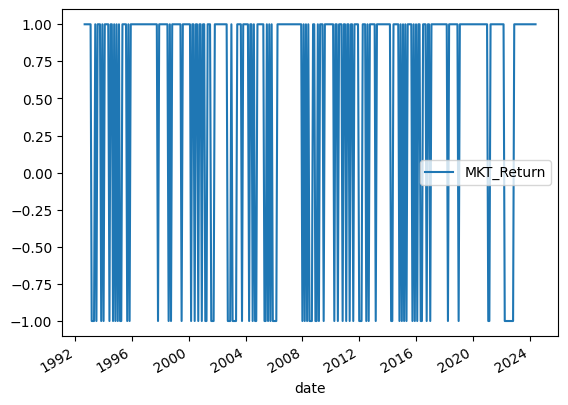

In [11]:
runner.strategy_weights.plot()